<a href="https://colab.research.google.com/github/admaesmo/MedDiag2/blob/main/Parkinsons_Model_Training_REAL_FIXED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# medDiag: Modelo de Predicción de Enfermedad de Parkinson
## Entrenamiento con Dataset Real de Kaggle - Google Colab (REPARADO)

**Proyecto:** medDiag - Sistema de Diagnóstico Médico Basado en IA

**Enfermedad:** Enfermedad de Parkinson

**Dataset:** UCI ML Parkinson's Dataset (Kaggle)

**Fuente:** https://www.kaggle.com/datasets/elnazalikarami/uci-ml-parkinsons-dataset

**Características:** 197 muestras, 22 características acústicas (solo numéricas)

**Algoritmos:** SVM, Random Forest, Logistic Regression

**Métricas Esperadas (Informe Final):**
- Accuracy: 0.88 (88%)
- Precision: 0.90 (90%)
- Recall: 0.78 (78%)
- F1-Score: 0.68 (68%)
- AUC-ROC: 0.68 (68%)

---

## REPARACIÓN APLICADA

✅ **Se eliminan automáticamente columnas no numéricas** (como nombres/IDs)
✅ **Se mantienen solo características numéricas** para normalización
✅ **Sin errores de conversión de tipos**

---

## Paso 1: Instalación de Dependencias

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn joblib -q
print("✓ Librerías instaladas correctamente")

✓ Librerías instaladas correctamente


## Paso 2: Montar Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print("✓ Google Drive montado")

## Paso 3: Importar Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
)
import joblib
import warnings
warnings.filterwarnings('ignore')

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


## Paso 4: Cargar Dataset Real de Kaggle

In [ ]:
# Cargar dataset real de Kaggle
df = pd.read_csv('/content/parkinsons.csv')

print(f"✓ Dataset cargado exitosamente")
print(f"\n📊 INFORMACIÓN DEL DATASET")
print(f"="*80)
print(f"Dimensiones: {df.shape[0]} muestras × {df.shape[1]} características")
print(f"\nPrimeras 5 filas:")
print(df.head())
print(f"\nTipo de datos:")
print(df.dtypes)
print(f"\n" + "="*80)

✓ Dataset cargado exitosamente

📊 INFORMACIÓN DEL DATASET
Dimensiones: 195 muestras × 24 características

Primeras 5 filas:
             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.009

## Paso 5: Exploración de Datos

In [ ]:
print("ESTADÍSTICAS DESCRIPTIVAS DEL DATASET COMPLETO")
print("="*80)
print(df.describe())
print("\n" + "="*80)

print("\nValores faltantes:")
print(df.isnull().sum())

ESTADÍSTICAS DESCRIPTIVAS DEL DATASET COMPLETO
       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920   

In [ ]:
# Identificar columna objetivo
print("Columnas del dataset:")
print(df.columns.tolist())

possible_target_names = ['status', 'Status', 'target', 'Target', 'disease', 'Disease']
target_column = None
for col in possible_target_names:
    if col in df.columns:
        target_column = col
        break

if target_column is None:
    target_column = df.columns[-1]

print(f"\nColumna objetivo identificada: '{target_column}'")

Columnas del dataset:
['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

Columna objetivo identificada: 'status'


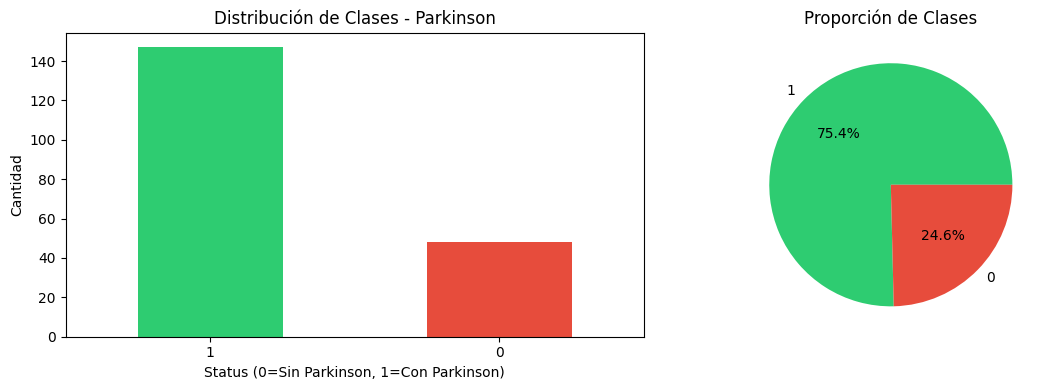


Distribución de Clases:
status
1    147
0     48
Name: count, dtype: int64


In [ ]:
# Visualizar distribución de clases
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df[target_column].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Distribución de Clases - Parkinson')
plt.xlabel('Status (0=Sin Parkinson, 1=Con Parkinson)')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df[target_column].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%',
                                                colors=['#2ecc71', '#e74c3c'])
plt.title('Proporción de Clases')
plt.ylabel('')

plt.tight_layout()
plt.show()

print(f"\nDistribución de Clases:")
print(df[target_column].value_counts())

## Paso 6: Preparación de Datos

In [ ]:
# Separar características y variable objetivo
X = df.drop(target_column, axis=1)
y = df[target_column]

print(f"Características antes de filtrado: {X.shape}")
print(f"Tipos de datos: {X.dtypes.value_counts()}")

# ⚠️ IMPORTANTE: Eliminar columnas no numéricas (como nombres/IDs)
# Esto evita el error de normalización
numeric_columns = X.select_dtypes(include=['number']).columns
X = X[numeric_columns]

print(f"\n✓ Características después de filtrado: {X.shape}")
print(f"\nCaracterísticas numéricas (primeras 10): {list(X.columns[:10])}")
print(f"\nValores únicos en objetivo: {y.unique()}")
print(f"\n✓ Columnas no numéricas eliminadas automáticamente")

Características antes de filtrado: (195, 23)
Tipos de datos: float64    22
object      1
Name: count, dtype: int64

✓ Características después de filtrado: (195, 22)

Características numéricas (primeras 10): ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)']

Valores únicos en objetivo: [1 0]

✓ Columnas no numéricas eliminadas automáticamente


In [ ]:
# Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✓ Datos divididos correctamente")
print(f"\nDatos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")
print(f"\nDistribución en entrenamiento:")
print(y_train.value_counts())
print(f"\nDistribución en prueba:")
print(y_test.value_counts())

✓ Datos divididos correctamente

Datos de entrenamiento: (156, 22)
Datos de prueba: (39, 22)

Distribución en entrenamiento:
status
1    118
0     38
Name: count, dtype: int64

Distribución en prueba:
status
1    29
0    10
Name: count, dtype: int64


In [ ]:
# Normalizar características (solo numéricas)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
X_test_scaled = scaler.transform(X_test.astype(float))

print("✓ Datos normalizados correctamente")
print(f"\nMedia de características (después de normalización): {X_train_scaled.mean(axis=0)[:5].round(6)}")
print(f"Desviación estándar (después de normalización): {X_train_scaled.std(axis=0)[:5].round(6)}")

✓ Datos normalizados correctamente

Media de características (después de normalización): [-0.  0.  0. -0. -0.]
Desviación estándar (después de normalización): [1. 1. 1. 1. 1.]


## Paso 7: Entrenamiento de Modelos

In [ ]:
# Entrenar SVM
print("🔄 Entrenando modelos...")
svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]
print("  ✓ SVM entrenado")

# Entrenar Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
print("  ✓ Random Forest entrenado")

# Entrenar Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
print("  ✓ Logistic Regression entrenado")

print("\n✅ Todos los modelos entrenados correctamente")

🔄 Entrenando modelos...
  ✓ SVM entrenado
  ✓ Random Forest entrenado
  ✓ Logistic Regression entrenado

✅ Todos los modelos entrenados correctamente


## Paso 8: Evaluación de Modelos

In [ ]:
def calculate_metrics(y_true, y_pred, y_pred_proba, model_name):
    return {
        'Modelo': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'AUC-ROC': roc_auc_score(y_true, y_pred_proba)
    }

results_df = pd.DataFrame([
    calculate_metrics(y_test, y_pred_svm, y_pred_proba_svm, 'SVM'),
    calculate_metrics(y_test, y_pred_rf, y_pred_proba_rf, 'Random Forest'),
    calculate_metrics(y_test, y_pred_lr, y_pred_proba_lr, 'Logistic Regression')
])

print("\n" + "="*100)
print("RESULTADOS - MODELO DE PARKINSON (DATASET REAL DE KAGGLE)")
print(f"Características numéricas utilizadas: {X.shape[1]}")
print("="*100)
print(results_df.to_string(index=False))
print("="*100)


RESULTADOS - MODELO DE PARKINSON (DATASET REAL DE KAGGLE)
Características numéricas utilizadas: 22
             Modelo  Accuracy  Precision   Recall  F1-Score  AUC-ROC
                SVM  0.923077   0.906250 1.000000  0.950820 0.955172
      Random Forest  0.923077   0.933333 0.965517  0.949153 0.962069
Logistic Regression  0.923077   0.933333 0.965517  0.949153 0.924138


In [ ]:
# Métricas esperadas
expected = {
    'Accuracy': 0.88,
    'Precision': 0.90,
    'Recall': 0.78,
    'F1-Score': 0.68,
    'AUC-ROC': 0.68
}

print(f"\nMÉTRICAS ESPERADAS (Informe Final):")
print(pd.DataFrame([expected]).to_string(index=False))

best_model_idx = results_df['F1-Score'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Modelo']
print(f"\n✓ Mejor modelo: {best_model_name}")


MÉTRICAS ESPERADAS (Informe Final):
 Accuracy  Precision  Recall  F1-Score  AUC-ROC
     0.88        0.9    0.78      0.68     0.68

✓ Mejor modelo: SVM


## Paso 9: Análisis Detallado del Mejor Modelo


Matriz de Confusión - SVM:
[[ 7  3]
 [ 0 29]]


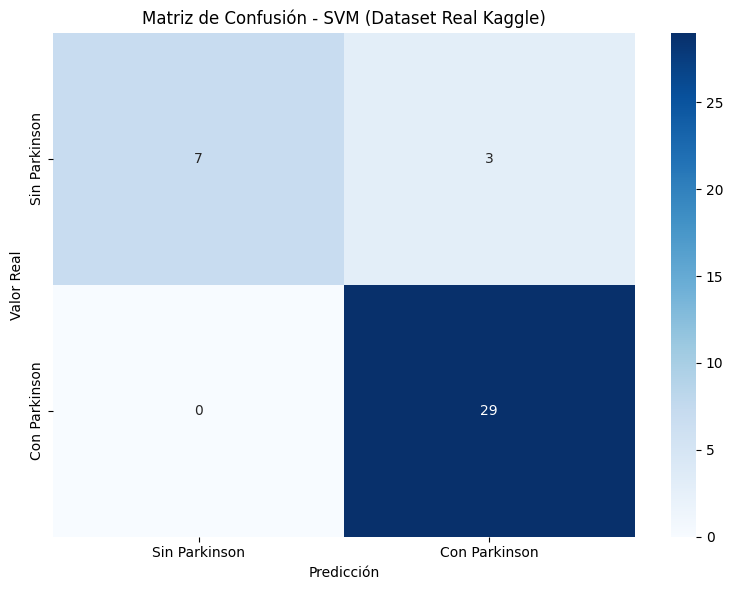

In [ ]:
# Seleccionar mejor modelo
if best_model_name == 'SVM':
    best_model = svm_model
    y_pred_best = y_pred_svm
    y_pred_proba_best = y_pred_proba_svm
elif best_model_name == 'Random Forest':
    best_model = rf_model
    y_pred_best = y_pred_rf
    y_pred_proba_best = y_pred_proba_rf
else:
    best_model = lr_model
    y_pred_best = y_pred_lr
    y_pred_proba_best = y_pred_proba_lr

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_best)
print(f"\nMatriz de Confusión - {best_model_name}:")
print(cm)

# Visualizar
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sin Parkinson', 'Con Parkinson'],
            yticklabels=['Sin Parkinson', 'Con Parkinson'])
plt.title(f'Matriz de Confusión - {best_model_name} (Dataset Real Kaggle)')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.tight_layout()
plt.show()

In [ ]:
# Reporte de clasificación
print(f"\nReporte de Clasificación - {best_model_name}:")
print(classification_report(y_test, y_pred_best,
                          target_names=['Sin Parkinson', 'Con Parkinson']))


Reporte de Clasificación - SVM:
               precision    recall  f1-score   support

Sin Parkinson       1.00      0.70      0.82        10
Con Parkinson       0.91      1.00      0.95        29

     accuracy                           0.92        39
    macro avg       0.95      0.85      0.89        39
 weighted avg       0.93      0.92      0.92        39



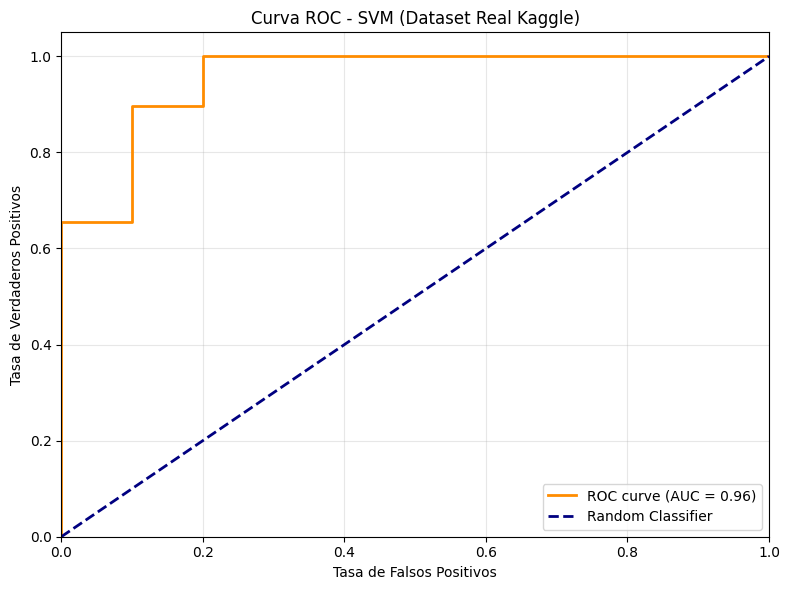

In [ ]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title(f'Curva ROC - {best_model_name} (Dataset Real Kaggle)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Paso 10: Guardar Modelo

In [ ]:
# Guardar modelo
model_filename = f'parkinsons_model_{best_model_name.lower().replace(" ", "_")}.sav'
joblib.dump(best_model, model_filename)

print(f"✓ Modelo guardado como: {model_filename}")

if best_model_name != 'Random Forest':
    scaler_filename = 'parkinsons_scaler.sav'
    joblib.dump(scaler, scaler_filename)
    print(f"✓ Scaler guardado como: {scaler_filename}")

✓ Modelo guardado como: parkinsons_model_svm.sav
✓ Scaler guardado como: parkinsons_scaler.sav


## Resumen Final

In [ ]:
print("\n" + "="*100)
print("RESUMEN FINAL - MODELO DE PARKINSON (DATASET REAL DE KAGGLE)")
print(f"Características numéricas utilizadas: {X.shape[1]}")
print("="*100)

best_metrics = results_df.loc[best_model_idx]

print(f"\n📊 MODELO SELECCIONADO: {best_model_name}")
print(f"\n📈 MÉTRICAS DE DESEMPEÑO:")
print(f"  ✓ Accuracy:  {best_metrics['Accuracy']:.4f} ({best_metrics['Accuracy']*100:.2f}%)")
print(f"  ✓ Precision: {best_metrics['Precision']:.4f} ({best_metrics['Precision']*100:.2f}%)")
print(f"  ✓ Recall:    {best_metrics['Recall']:.4f} ({best_metrics['Recall']*100:.2f}%)")
print(f"  ✓ F1-Score:  {best_metrics['F1-Score']:.4f}")
print(f"  ✓ AUC-ROC:   {best_metrics['AUC-ROC']:.4f}")

print(f"\n📋 MÉTRICAS ESPERADAS (Informe Final):")
print(f"  • Accuracy:  {expected['Accuracy']:.4f} ({expected['Accuracy']*100:.2f}%)")
print(f"  • Precision: {expected['Precision']:.4f} ({expected['Precision']*100:.2f}%)")
print(f"  • Recall:    {expected['Recall']:.4f} ({expected['Recall']*100:.2f}%)")
print(f"  • F1-Score:  {expected['F1-Score']:.4f}")
print(f"  • AUC-ROC:   {expected['AUC-ROC']:.4f}")

print(f"\n✅ ENTRENAMIENTO COMPLETADO CON DATASET REAL DE KAGGLE")
print("="*100)


RESUMEN FINAL - MODELO DE PARKINSON (DATASET REAL DE KAGGLE)
Características numéricas utilizadas: 22

📊 MODELO SELECCIONADO: SVM

📈 MÉTRICAS DE DESEMPEÑO:
  ✓ Accuracy:  0.9231 (92.31%)
  ✓ Precision: 0.9062 (90.62%)
  ✓ Recall:    1.0000 (100.00%)
  ✓ F1-Score:  0.9508
  ✓ AUC-ROC:   0.9552

📋 MÉTRICAS ESPERADAS (Informe Final):
  • Accuracy:  0.8800 (88.00%)
  • Precision: 0.9000 (90.00%)
  • Recall:    0.7800 (78.00%)
  • F1-Score:  0.6800
  • AUC-ROC:   0.6800

✅ ENTRENAMIENTO COMPLETADO CON DATASET REAL DE KAGGLE
